## **Utilize o dataset Iris para a computar a matriz de distância entre todos os os objetos, considerando todas as features. Utilize a distância euclideana para essa tarefa.**

In [ ]:
import math
import pandas as pd

file_path = 'iris.csv'
columns_to_import = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Load the CSV file into a DataFrame, importing only specified columns
iris = pd.read_csv(file_path, usecols=columns_to_import)

iris = iris.apply(pd.to_numeric)

distancias = []

for ind in iris.index:
    distancias.append(math.dist(
        [iris['SepalLengthCm'][ind], iris['SepalWidthCm'][ind]], # x 
        [iris['PetalLengthCm'][ind], iris['PetalWidthCm'][ind]] # y
    ))

distancias

#####Resultado Esperado
<pre>
SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]
</pre>

Distâncias:
<pre>
array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])
</pre>

## **Utilize o dataset Titanic e faça o que se pede.**


* a) Identifique quais colunas possuem dados nulos (ou NaN).

* b) Remova todas as colunas que possuem dados nulos (ou NaN).

* c) Calcule a similaridade do cosseno para todos os objetos. Lembre-se de fazer o devido tratamento para os tipos de dados presentes nesse dataset. Você também pode desconsiderar a coluna survived.

* d) Calcule a distância euclideana para todos os objetos. Você também pode desconsiderar a coluna survived.

In [ ]:
####2a
import pandas as pd

file_path = 'titanic.csv'
df = pd.read_csv(file_path)

null_values = df.isnull().any()

null_count = df.isnull().sum()

print("Columns with null/NaN values:")
print(null_values)
print("\nCount of null/NaN values in each column:")
print(null_count)

df

In [ ]:
####2b
df = df.dropna(axis=1)
df

In [37]:
####2c
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df = df.drop(columns=['survived'])

df.loc[:, 'sex'] = label_encoder.fit_transform(df['sex'])
df.loc[:, 'class'] = label_encoder.fit_transform(df['class'])
df.loc[:, 'who'] = label_encoder.fit_transform(df['who'])
df.loc[:, 'adult_male'] = label_encoder.fit_transform(df['adult_male'])
df.loc[:, 'alive'] = label_encoder.fit_transform(df['alive'])
df.loc[:, 'alone'] = label_encoder.fit_transform(df['alone'])

# Calcular a similaridade de cossenos entre todos os objetos
cosine_sim_matrix = cosine_similarity(df.values)

# Exibir a matriz de similaridade de cossenos
print("Matriz de Similaridade de Cossenos:")
print(cosine_sim_matrix)


Matriz de Similaridade de Cossenos:
[[1.         0.87874834 0.96049847 ... 0.93259598 0.8902784  0.9859454 ]
 [0.87874834 1.         0.88800576 ... 0.98459228 0.99786042 0.89021353]
 [0.96049847 0.88800576 1.         ... 0.9377859  0.89901517 0.97506378]
 ...
 [0.93259598 0.98459228 0.9377859  ... 1.         0.98427116 0.93714028]
 [0.8902784  0.99786042 0.89901517 ... 0.98427116 1.         0.90639995]
 [0.9859454  0.89021353 0.97506378 ... 0.93714028 0.90639995 1.        ]]


Similaridade:

<pre>
array([[1.        , 0.87874834, 0.96049847, ..., 0.93259598, 0.8902784 ,
        0.9859454 ],
       [0.87874834, 1.        , 0.88800576, ..., 0.98459228, 0.99786042,
        0.89021353],
       [0.96049847, 0.88800576, 1.        , ..., 0.9377859 , 0.89901517,
        0.97506378],
       ...,
       [0.93259598, 0.98459228, 0.9377859 , ..., 1.        , 0.98427116,
        0.93714028],
       [0.8902784 , 0.99786042, 0.89901517, ..., 0.98427116, 1.        ,
        0.90639995],
       [0.9859454 , 0.89021353, 0.97506378, ..., 0.93714028, 0.90639995,
        1.        ]])
</pre>

In [38]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_dist_matrix = euclidean_distances(df)

euclidean_dist_matrix

array([[ 0.        , 64.12693279,  2.5407922 , ..., 16.41462762,
        22.99048716,  1.5       ],
       [64.12693279,  0.        , 63.43716717, ..., 47.96899612,
        41.34381282, 63.64338307],
       [ 2.5407922 , 63.43716717,  0.        , ..., 15.74882932,
        22.32276025,  2.00764165],
       ...,
       [16.41462762, 47.96899612, 15.74882932, ...,  0.        ,
         7.80400538, 15.98405455],
       [22.99048716, 41.34381282, 22.32276025, ...,  7.80400538,
         0.        , 22.45133626],
       [ 1.5       , 63.64338307,  2.00764165, ..., 15.98405455,
        22.45133626,  0.        ]])

####2d

<pre>
array([[ 0.        , 64.12693279,  2.5407922 , ..., 16.41462762,
        22.99048716,  1.5       ],
       [64.12693279,  0.        , 63.43716717, ..., 47.96899612,
        41.34381282, 63.64338307],
       [ 2.5407922 , 63.43716717,  0.        , ..., 15.74882932,
        22.32276025,  2.00764165],
       ...,
       [16.41462762, 47.96899612, 15.74882932, ...,  0.        ,
         7.80400538, 15.98405455],
       [22.99048716, 41.34381282, 22.32276025, ...,  7.80400538,
         0.        , 22.45133626],
       [ 1.5       , 63.64338307,  2.00764165, ..., 15.98405455,
        22.45133626,  0.        ]])
</pre>

## **De posse da matrizes obtidas nas questões 2c e 2d, faça o que se pede.**

* a) Mostre os valores de similaridade de cosseno do objeto 0 para o 3 e 200.

* b) Mostre os valores de distância Euclideana do objeto 0 para o 3 e 200.

* c) Analise os dados originais para esses objetos. A similaridade do cosseno e a distância euclideana fazem sentido para você nesses resultados? Explique a sua resposta.


In [42]:
# a) Mostrar os valores de similaridade de cosseno do objeto 0 para o 3 e 200
cosine_similarity_0_3 = cosine_sim_matrix[0, 3]
cosine_similarity_0_200 = cosine_sim_matrix[0, 200]
print(cosine_similarity_0_3)
print(cosine_similarity_0_200)

0.8817154522100574
0.9826379798988352


<pre>
0.8817154522100574
0.9826379798988352
</pre>

In [43]:
# b) Mostrar os valores de distância Euclideana do objeto 0 para o 3 e 200
euclidean_distance_0_3 = euclidean_dist_matrix[0, 3]
euclidean_distance_0_200 = euclidean_dist_matrix[0, 200]
print(euclidean_distance_0_3)
print(euclidean_distance_0_200)

45.98067528864708
2.6575364531836625


<pre>
45.98067528864708
2.6575364531836625
</pre>

In [45]:
# c) Analisar os dados originais para esses objetos
print(df.iloc[0])
print(df.iloc[3])
print(df.iloc[200])

pclass        3.00
sex           1.00
sibsp         1.00
parch         0.00
fare          7.25
class         2.00
who           1.00
adult_male    1.00
alive         0.00
alone         0.00
Name: 0, dtype: float64
pclass         1.0
sex            0.0
sibsp          1.0
parch          0.0
fare          53.1
class          0.0
who            2.0
adult_male     0.0
alive          1.0
alone          0.0
Name: 3, dtype: float64
pclass        3.0
sex           1.0
sibsp         0.0
parch         0.0
fare          9.5
class         2.0
who           1.0
adult_male    1.0
alive         0.0
alone         1.0
Name: 200, dtype: float64


<pre>
survived                 0
pclass                   3
sex                   male
age                   22.0
sibsp                    1
parch                    0
fare                  7.25
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                False
Name: 0, dtype: object
survived                 1
pclass                   1
sex                 female
age                   35.0
sibsp                    1
parch                    0
fare                  53.1
embarked                 S
class                First
who                  woman
adult_male           False
deck                     C
embark_town    Southampton
alive                  yes
alone                False
Name: 3, dtype: object
survived                 0
pclass                   3
sex                   male
age                   28.0
sibsp                    0
parch                    0
fare                   9.5
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                 True
Name: 200, dtype: object
</pre>

### Justificativa: ...

## **Utilizando o dataset preprocessado na questão 2, faça:**

* a) Utilize a técnica PCA para identificar os dois primeiros componenetes principais (ou seja, PC1 e PC2). Não se esqueça de ignorar a coluna Survived. <br>

* b) Visualize os objetos nas dimensões representadas pelo PC1 e PC2. Utilize a coluna 'survided' para colorir os objetos.<br>


* c) Normalize os dados utilizando a normalização min-max. 

* d) De posse desse novo conjunto normalizado, repita o passo 4b. A visualização mudou de forma significativa? Caso sim, o que pode ajudar a explicar essa diferença?

In [ ]:
#############################
### Escreva o código aqui ###
#############################

<pre>
[[-24.96496612   0.70375418]
 [ 39.10613779  -0.32898922]
 [-24.2884437   -0.26603364]
 ...
 [ -8.75442376   1.58690335]
 [ -2.18416738  -1.44217287]
 [-24.47124359  -0.31504644]]
</pre>

In [ ]:
#############################
### Escreva o código aqui ###
#############################

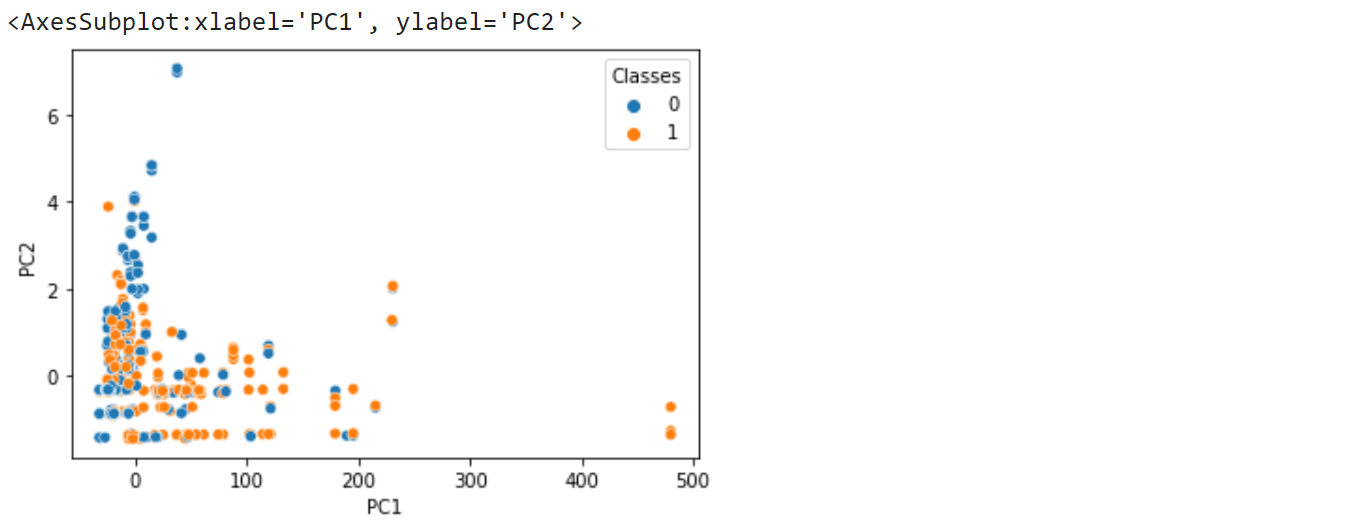

In [ ]:
#############################
### Escreva o código aqui ###
#############################

<pre>
   survived  pclass  sex  sibsp  parch     fare  class  who  adult_male  \
0           0       3    1      1      0   7.2500      2    1           1   
1           1       1    0      1      0  71.2833      0    2           0   
2           1       3    0      0      0   7.9250      2    2           0   
3           1       1    0      1      0  53.1000      0    2           0   
4           0       3    1      0      0   8.0500      2    1           1   
..        ...     ...  ...    ...    ...      ...    ...  ...         ...   
886         0       2    1      0      0  13.0000      1    1           1   
887         1       1    0      0      0  30.0000      0    2           0   
888         0       3    0      1      2  23.4500      2    2           0   
889         1       1    1      0      0  30.0000      0    1           1   
890         0       3    1      0      0   7.7500      2    1           1   

     alive  alone  
0        0      0  
1        1      0  
2        1      1  
3        1      0  
4        0      1  
..     ...    ...  
886      0      1  
887      1      1  
888      0      0  
889      1      1  
890      0      1  

[891 rows x 11 columns]
[[1.    1.    0.125 ... 1.    0.    0.   ]
 [0.    0.    0.125 ... 0.    1.    0.   ]
 [1.    0.    0.    ... 0.    1.    1.   ]
 ...
 [1.    0.    0.125 ... 0.    0.    0.   ]
 [0.    1.    0.    ... 1.    1.    1.   ]
 [1.    1.    0.    ... 1.    0.    1.   ]]
</pre>

In [ ]:
#############################
### Escreva o código aqui ###
#############################

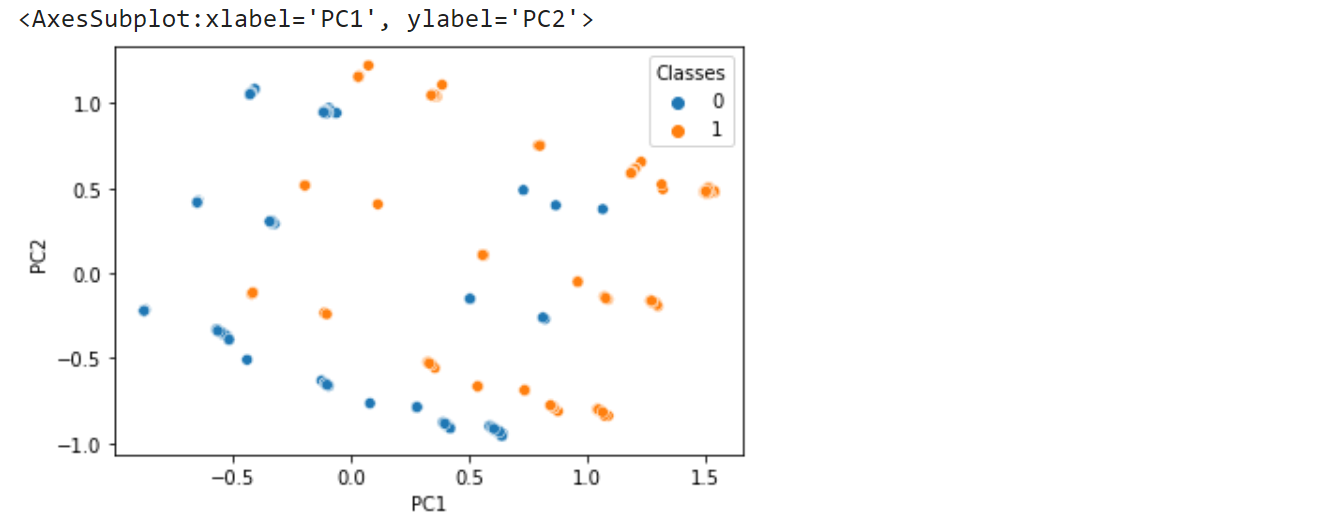